# Exercise: "Human learning" with iris data

**Question:** Can you predict the species of an iris using petal and sepal measurements?

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.


**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (18, 16)
plt.rcParams['font.size'] = 12

## Task 1

Read the iris data into a pandas DataFrame, including column names.

In [2]:
# define a list of column names (as strings)
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# define the URL from which to retrieve the data (as a string)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# retrieve the CSV file and add the column names
iris = pd.read_csv(url, na_filter = False, names=col_names)

In [3]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


## Task 2

Gather some basic information about the data.

In [4]:
# shape of the DataFrame
iris.shape

(150, 5)

In [5]:
# look at the head
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [21]:
# look at the data types for all the columns
print iris.dtypes

l = [(col, type(iris.loc[0, col])) for col in iris.columns]
l

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


[('sepal_length', numpy.float64),
 ('sepal_width', numpy.float64),
 ('petal_length', numpy.float64),
 ('petal_width', numpy.float64),
 ('species', str)]

In [22]:
# use describe to get statistical summaries
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
# how many of each "species" are there?
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## Task 3

Use sorting, split-apply-combine, and/or visualization to look for differences between species.

### sorting

In [42]:
# sort the DataFrame by petal_width and display the NumPy array
#sorted_iris = iris.sort(columns=['petal_width'], ascending = True)
sorted_iris = iris.sort_values(by=['petal_width'], ascending = True)
sorted_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


In [44]:
a = sorted_iris.values
a[0:3]

array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa']], dtype=object)

### split-apply-combine

In [47]:
# mean of sepal_length grouped by species
iris.groupby('species').sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [48]:
# mean of all numeric columns grouped by species
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [49]:
# use describe() for all numeric columns, grouped by species
iris.groupby('species').describe()

petal_length  petal_width  sepal_length  sepal_width
species                                                                    
Iris-setosa     count     50.000000    50.000000     50.000000    50.000000
                mean       1.464000     0.244000      5.006000     3.418000
                std        0.173511     0.107210      0.352490     0.381024
                min        1.000000     0.100000      4.300000     2.300000
                25%        1.400000     0.200000      4.800000     3.125000
                50%        1.500000     0.200000      5.000000     3.400000
                75%        1.575000     0.300000      5.200000     3.675000
                max        1.900000     0.600000      5.800000     4.400000
Iris-versicolor count     50.000000    50.000000     50.000000    50.000000
                mean       4.260000     1.326000      5.936000     2.770000
                std        0.469911     0.197753      0.516171     0.313798
                min        3.000000     1.000000      4.900000     2.000000
                25%        4.000000     1.200000      5.600000     2.525000
                50%        4.350000     1.300000      5.900000     2.800000
                75%        4.600000     1.500000      6.300000     3.000000
                max        5.100000     1.800000      7.000000     3.400000
Iris-virginica  count     50.000000    50.000000     50.000000    50.000000
                mean       5.552000     2.026000      6.588000     2.974000
                std        0.551895     0.274650      0.635880     0.322497
                min        4.500000     1.400000      4.900000     2.200000
                25%        5.100000     1.800000      6.225000     2.800000
                50%        5.550000     2.000000      6.500000     3.000000
                75%        5.875000     2.300000      6.900000     3.175000
                max        6.900000     2.500000      7.900000     3.800000

### visualization

([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
           2.,   1.,   1.,  11.,  11.,   6.,   3.,   8.,   6.]),
  array([ 34.,   7.,   7.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,   3.,   5.,  20.,
          10.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.])],
 array([ 0.1 ,  0.22,  0.34,  0.46,  0.58,  0.7 ,  0.82,  0.94,  1.06,
         1.18,  1.3 ,  1.42,  1.54,  1.66,  1.78,  1.9 ,  2.02,  2.14,
         2.26,  2.38,  2.5 ]),
 <a list of 3 Lists of Patches objects>)

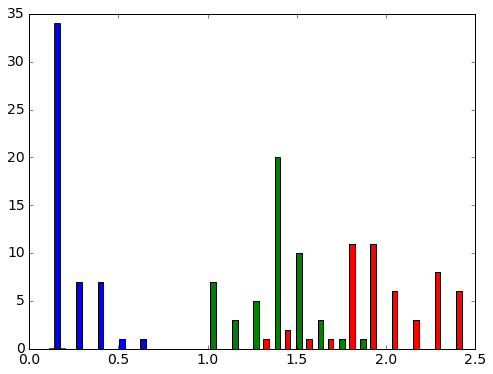

In [156]:
# histogram of petal_width grouped by species
d = [ iris[iris.species==s].petal_width for s in set(iris.species.values) ]
plt.hist(d, color=['red','blue','green'], label='setosa    versicolor  virginica', bins=20)
"""
# Question:  Can't seem to control which color goes with which data set...?  Is the only way by colormaps?
Also I could not get the label to work at all...
"""

([array([ 34.,   7.,   7.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,   3.,   5.,  20.,
          10.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
           2.,   1.,   1.,  11.,  11.,   6.,   3.,   8.,   6.])],
 array([ 0.1 ,  0.22,  0.34,  0.46,  0.58,  0.7 ,  0.82,  0.94,  1.06,
         1.18,  1.3 ,  1.42,  1.54,  1.66,  1.78,  1.9 ,  2.02,  2.14,
         2.26,  2.38,  2.5 ]),
 <a list of 3 Lists of Patches objects>)

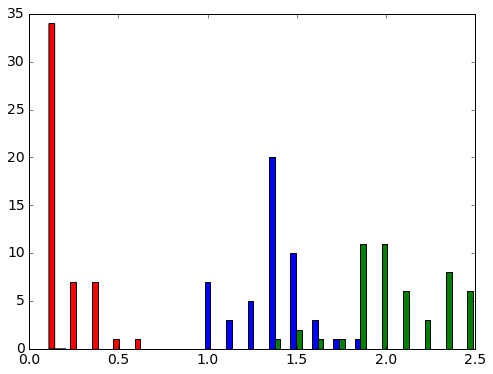

In [81]:
# this is a longer version of the above
a = iris[iris.species=='Iris-setosa'].petal_width
b = iris[iris.species=='Iris-versicolor'].petal_width
c = iris[iris.species=='Iris-virginica'].petal_width
plt.hist([a,b,c], color=['red','blue','green'], bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7f6eb9345190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6eb93520d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6eb935d3d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6eb9352d50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6eb9345390>,
  <matplotlib.lines.Line2D at 0x7f6eb930d2d0>]}

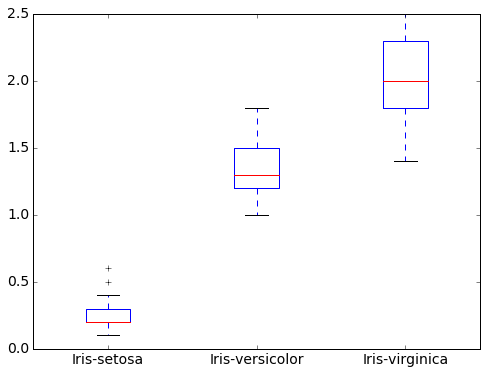

In [151]:
# box plot of petal_width grouped by species
keys = sorted(set(iris.species.values))
d = [ iris[iris.species==s].petal_width for s in keys ]
plt.boxplot(d, labels=keys)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eb0a17fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6eb08365d0>]], dtype=object)

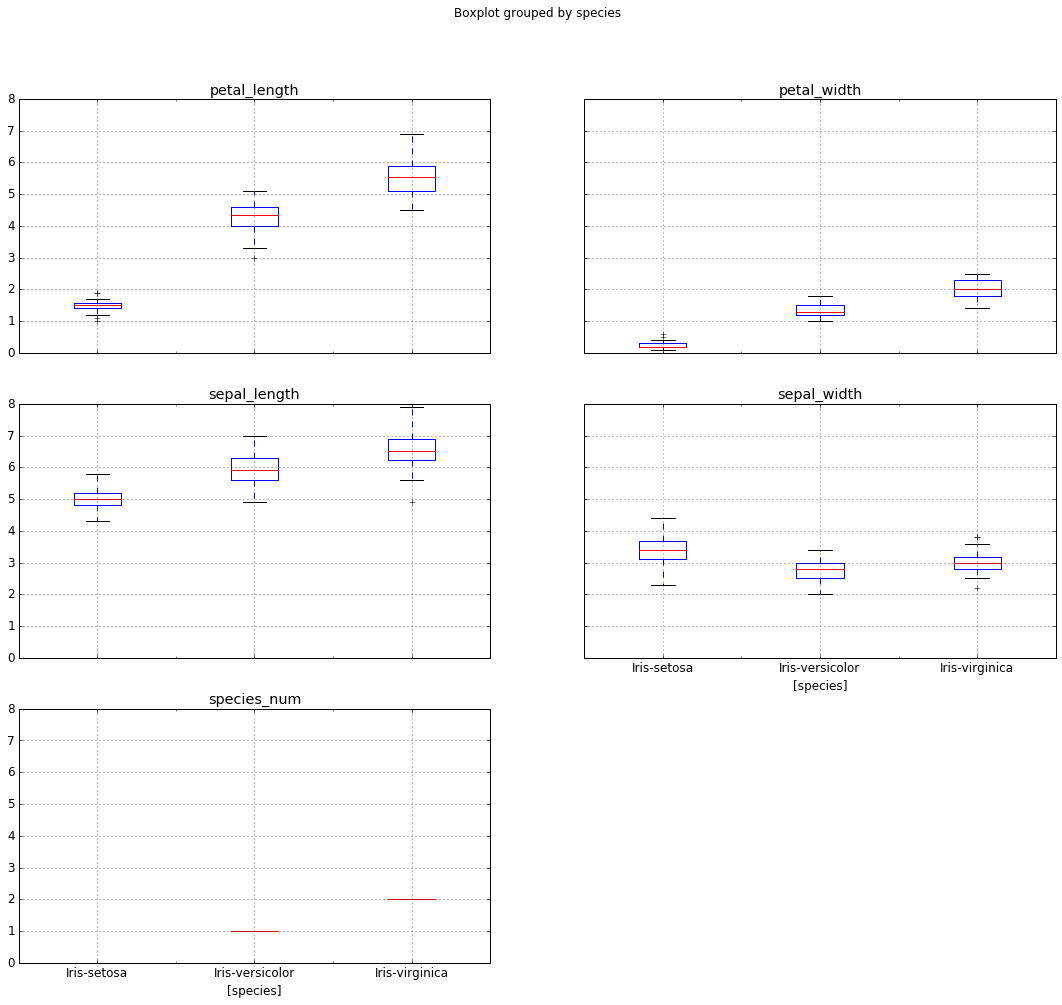

In [183]:
# box plot of all numeric columns grouped by species
iris.boxplot(by='species')

In [164]:
# map species to a numeric value so that plots can be colored by species
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# alternative method
iris['species_num'] = iris.species.factorize()[0]

In [175]:
# This is a pandas function that applies a unique index to each unique value
iris.species.factorize()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index([u'Iris-setosa', u'Iris-versicolor', u'Iris-virginica'], dtype='object'))

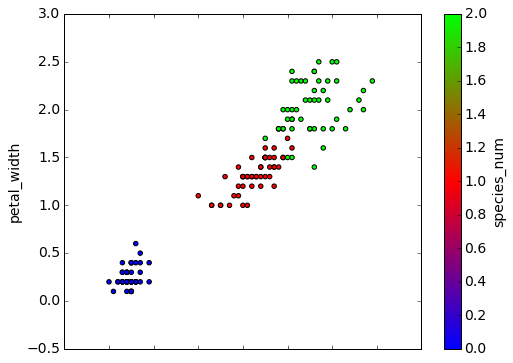

In [176]:
# scatter plot of petal_length vs petal_width colored by species
"""
# Question:  How exactly does colormap work? It looks like it is index-based, but the python help says:
colormap : str or matplotlib colormap object, default None
 |          Colormap to select colors from. If string, load colormap with that name
 |          from matplotlib.
"""
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg')

In [178]:
iris.columns

Index([u'sepal_length', u'sepal_width', u'petal_length', u'petal_width',
       u'species', u'species_num'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eab877e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6ea9b9b550>]], dtype=object)

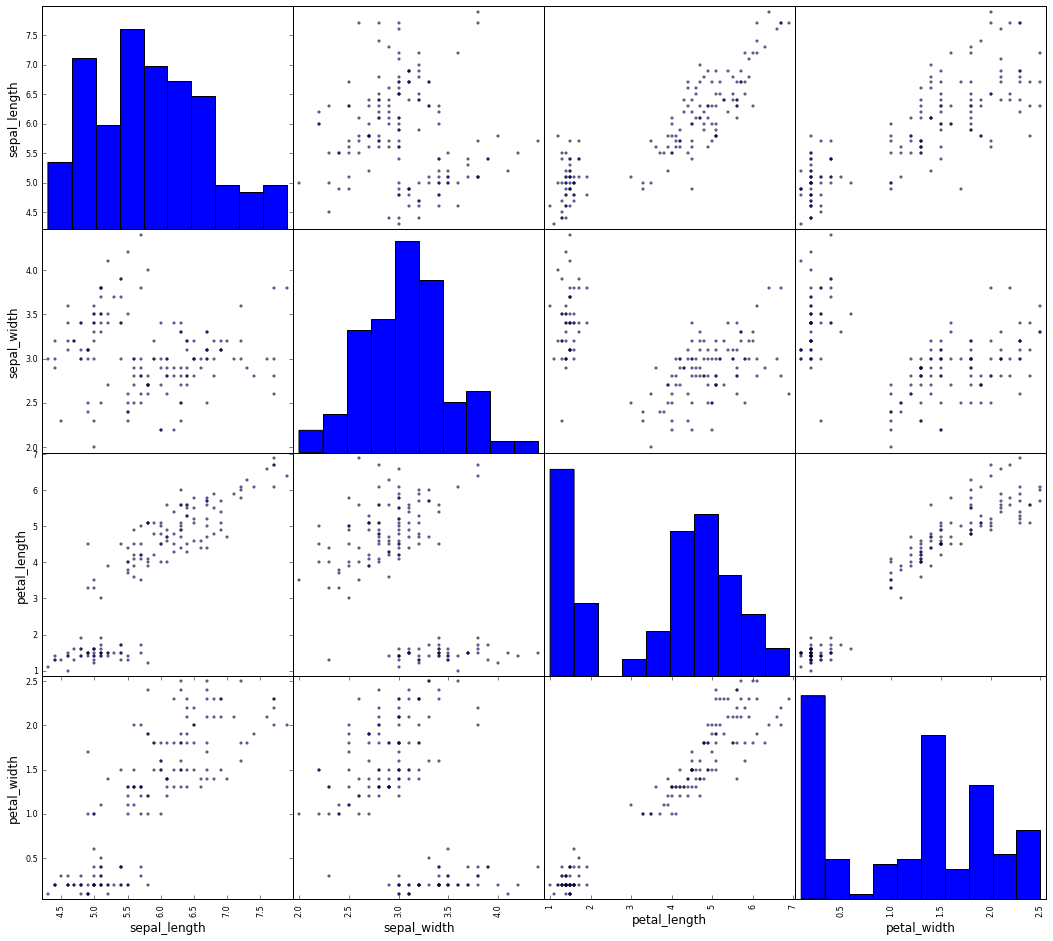

In [192]:
# scatter matrix of all features colored by species
"""
Question: I am not sure how to make scatter_matrix designate colors
How to get this cell to be longer?
"""
pd.scatter_matrix(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

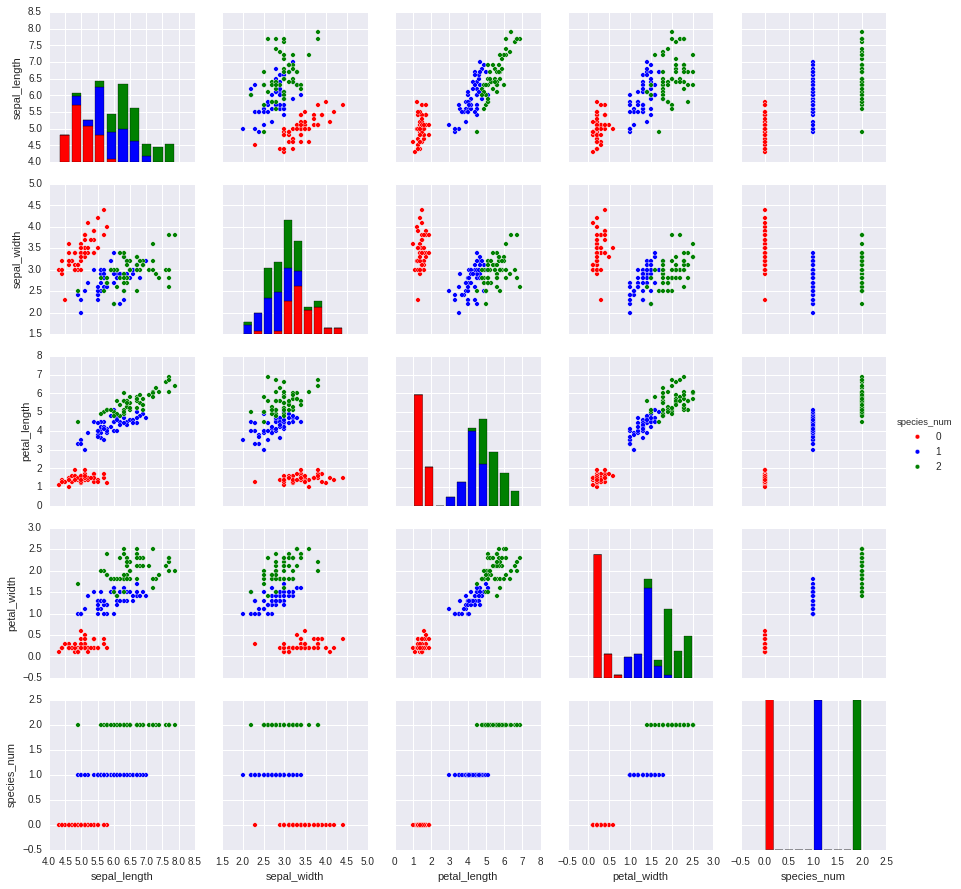

In [200]:
import seaborn as sns
palette = {0:'r', 1:'b', 2:'g'}
"""
Question: I could not get this to display without putting series_num in the pairplots themselves. 
"""
sns.pairplot(iris, hue='species_num', palette=palette)

## Task 4

Write down a set of rules that could be used to predict species based on iris measurements.

In [201]:
# define a new feature that represents petal area ("feature engineering")
iris['area'] = iris['petal_width'] * iris['petal_length']

In [202]:
# description of petal_area grouped by species
iris.area.describe()

count    150.000000
mean       5.793133
std        4.713499
min        0.110000
25%        0.420000
50%        5.615000
75%        9.690000
max       15.870000
Name: area, dtype: float64

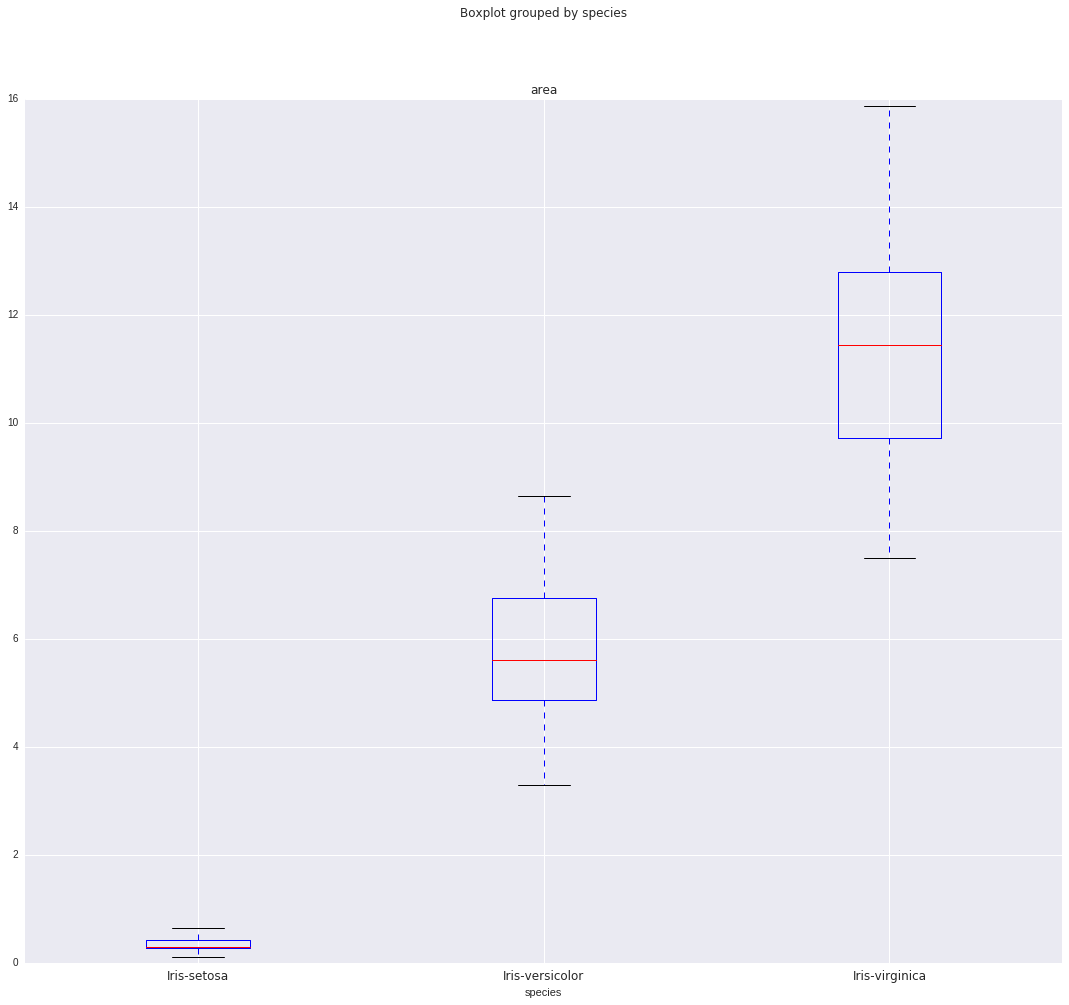

In [205]:
# box plot of petal_area grouped by species
iris.boxplot('area', by='species')

In [207]:
# only show irises with a petal_area between 7 and 9
iris[(iris.area < 9) & (iris.area > 7)]

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,area
52,6.9,3.1,4.9,1.5,Iris-versicolor,1,7.35
56,6.3,3.3,4.7,1.6,Iris-versicolor,1,7.52
70,5.9,3.2,4.8,1.8,Iris-versicolor,1,8.64
72,6.3,2.5,4.9,1.5,Iris-versicolor,1,7.35
77,6.7,3.0,5.0,1.7,Iris-versicolor,1,8.50
83,6.0,2.7,5.1,1.6,Iris-versicolor,1,8.16
85,6.0,3.4,4.5,1.6,Iris-versicolor,1,7.20
86,6.7,3.1,4.7,1.5,Iris-versicolor,1,7.05
106,4.9,2.5,4.5,1.7,Iris-virginica,2,7.65
119,6.0,2.2,5.0,1.5,Iris-virginica,2,7.50


In [217]:
iris.groupby('species_num').describe()
"""
Question:  How to split between septosa and versicolor when there is a gap and no data provides support.
Do you alert as something to look further into or do you pick the middle and classify it a particular way?
Predict 0 or septosa: if area < 2.13 
Predict 1 or versicolor: if area >= 2.13 & area < 7.5
Predict 2 or virginica: if area >= 7.5 
"""

area  petal_length  petal_width  sepal_length  \
species_num                                                             
0           count  50.000000     50.000000    50.000000     50.000000   
            mean    0.362800      1.464000     0.244000      5.006000   
            std     0.183248      0.173511     0.107210      0.352490   
            min     0.110000      1.000000     0.100000      4.300000   
            25%     0.265000      1.400000     0.200000      4.800000   
            50%     0.300000      1.500000     0.200000      5.000000   
            75%     0.420000      1.575000     0.300000      5.200000   
            max     0.960000      1.900000     0.600000      5.800000   
1           count  50.000000     50.000000    50.000000     50.000000   
            mean    5.720400      4.260000     1.326000      5.936000   
            std     1.368403      0.469911     0.197753      0.516171   
            min     3.300000      3.000000     1.000000      4.900000   
            25%     4.860000      4.000000     1.200000      5.600000   
            50%     5.615000      4.350000     1.300000      5.900000   
            75%     6.750000      4.600000     1.500000      6.300000   
            max     8.640000      5.100000     1.800000      7.000000   
2           count  50.000000     50.000000    50.000000     50.000000   
            mean   11.296200      5.552000     2.026000      6.588000   
            std     2.157412      0.551895     0.274650      0.635880   
            min     7.500000      4.500000     1.400000      4.900000   
            25%     9.717500      5.100000     1.800000      6.225000   
            50%    11.445000      5.550000     2.000000      6.500000   
            75%    12.790000      5.875000     2.300000      6.900000   
            max    15.870000      6.900000     2.500000      7.900000   

                   sepal_width  
species_num                     
0           count    50.000000  
            mean      3.418000  
            std       0.381024  
            min       2.300000  
            25%       3.125000  
            50%       3.400000  
            75%       3.675000  
            max       4.400000  
1           count    50.000000  
            mean      2.770000  
            std       0.313798  
            min       2.000000  
            25%       2.525000  
            50%       2.800000  
            75%       3.000000  
            max       3.400000  
2           count    50.000000  
            mean      2.974000  
            std       0.322497  
            min       2.200000  
            25%       2.800000  
            50%       3.000000  
            75%       3.175000  
            max       3.800000

My set of rules for predicting species:

- If petal_area is less than 2, predict **setosa**.
- Else if petal_area is less than 7.4, predict **versicolor**.
- Otherwise, predict **virginica**.

## Bonus

Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

In [250]:
# given a row of data, return a predicted species_num (0/1/2)

def predict_species(r):
    a=r.area
    res = -1
    if a <= 2.13:
        res = 0.0
    elif (a > 2.13) & (a < 7.5):
        res = 1.0
    elif a >= 7.5:
        res = 2.0

    print 'area predict= %r %r' % (a, res)
    
    return res
    

In [251]:
# print the first row
print predict_species(iris.iloc[0])
iris.iloc[0]

area predict= 0.27999999999999997 0.0
0.0


sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
species         Iris-setosa
species_num               0
area                   0.28
predict                   2
Name: 0, dtype: object

In [252]:
# print the last row
print predict_species(iris.iloc[-1])
iris.iloc[-1]

area predict= 9.1799999999999997 2.0
2.0


sepal_length               5.9
sepal_width                  3
petal_length               5.1
petal_width                1.8
species         Iris-virginica
species_num                  2
area                      9.18
predict                      2
Name: 149, dtype: object

In [253]:
# test the function on the first and last rows
print predict_species(iris.iloc[0]) == iris.iloc[0].species_num
print predict_species(iris.iloc[-1]) == iris.iloc[-1].species_num

area predict= 0.27999999999999997 0.0
True
area predict= 9.1799999999999997 2.0
True


In [257]:
# make predictions for all rows and store them in the DataFrame
for i, row in iris.iterrows():
    iris.loc[i,'predict'] = predict_species(row)

area predict= 0.27999999999999997 0.0
area predict= 0.27999999999999997 0.0
area predict= 0.26 0.0
area predict= 0.30000000000000004 0.0
area predict= 0.27999999999999997 0.0
area predict= 0.68 0.0
area predict= 0.42 0.0
area predict= 0.30000000000000004 0.0
area predict= 0.27999999999999997 0.0
area predict= 0.15000000000000002 0.0
area predict= 0.30000000000000004 0.0
area predict= 0.32000000000000006 0.0
area predict= 0.13999999999999999 0.0
area predict= 0.11000000000000001 0.0
area predict= 0.24 0.0
area predict= 0.6000000000000001 0.0
area predict= 0.52 0.0
area predict= 0.42 0.0
area predict= 0.51 0.0
area predict= 0.44999999999999996 0.0
area predict= 0.34 0.0
area predict= 0.6000000000000001 0.0
area predict= 0.2 0.0
area predict= 0.85 0.0
area predict= 0.38 0.0
area predict= 0.32000000000000006 0.0
area predict= 0.6400000000000001 0.0
area predict= 0.30000000000000004 0.0
area predict= 0.27999999999999997 0.0
area predict= 0.32000000000000006 0.0
area predict= 0.3200000000000

In [258]:
# calculate the percentage of correct predictions
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,area,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.28,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.28,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.26,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.30,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.28,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0,0.68,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0,0.42,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0,0.30,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0,0.28,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0,0.15,0


In [259]:
sum(iris.predict == iris.species_num)

146

In [260]:
len(iris)

150

In [264]:
sum(iris.predict == iris.species_num) / float(len(iris))

0.97333333333333338